# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from pprint import pprint
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# List for holding reponse information

lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
   
    time.sleep(1)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")


Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | haines junction
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | taoudenni
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | torbay
Processing Record 11 of Set 1 | belz
Processing Record 12 of Set 1 | mocuba
Processing Record 13 of Set 1 | vila franca do campo
Processing Record 14 of Set 1 | zarubino
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | havoysund
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | nanakuli
Processing Record 22 of Set 1 | uvira
Processing Record 

Processing Record 184 of Set 1 | cape town
Processing Record 185 of Set 1 | constitucion
Processing Record 186 of Set 1 | bolkhov
Processing Record 187 of Set 1 | san cristobal
Processing Record 188 of Set 1 | cocorit
Processing Record 189 of Set 1 | hofn
Processing Record 190 of Set 1 | aksu
Processing Record 191 of Set 1 | mosquera
Processing Record 192 of Set 1 | cozumel
Processing Record 193 of Set 1 | los chiles
Processing Record 194 of Set 1 | norman wells
Processing Record 195 of Set 1 | korla
Processing Record 196 of Set 1 | fortuna
Processing Record 197 of Set 1 | beringovskiy
Processing Record 198 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 199 of Set 1 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 200 of Set 1 | oktyabrskiy
Processing Record 201 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 202 of Set 1 | kaupanger
Processing Record 203 of Set 1 | juneau
Processing Record 204 of Set 1 | mianyang
Processing 

Processing Record 367 of Set 1 | alofi
Processing Record 368 of Set 1 | kerema
Processing Record 369 of Set 1 | jaciara
Processing Record 370 of Set 1 | kathu
Processing Record 371 of Set 1 | glenwood springs
Processing Record 372 of Set 1 | aitape
Processing Record 373 of Set 1 | lata
Processing Record 374 of Set 1 | lubango
Processing Record 375 of Set 1 | piacabucu
Processing Record 376 of Set 1 | chicama
Processing Record 377 of Set 1 | lekoni
Processing Record 378 of Set 1 | khorinsk
Processing Record 379 of Set 1 | breves
Processing Record 380 of Set 1 | areka
Processing Record 381 of Set 1 | mount isa
Processing Record 382 of Set 1 | saint george
Processing Record 383 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 384 of Set 1 | dharchula
Processing Record 385 of Set 1 | pavilosta
Processing Record 386 of Set 1 | killarney
Processing Record 387 of Set 1 | kyabram
Processing Record 388 of Set 1 | ahipara
Processing Record 389 of Set 1 | urumqi
Processing Rec

Processing Record 551 of Set 1 | fort nelson
Processing Record 552 of Set 1 | katobu
Processing Record 553 of Set 1 | sabha
Processing Record 554 of Set 1 | slawno
Processing Record 555 of Set 1 | vanimo
Processing Record 556 of Set 1 | vardo
Processing Record 557 of Set 1 | conceicao do araguaia
Processing Record 558 of Set 1 | sohag
Processing Record 559 of Set 1 | agapovka
Processing Record 560 of Set 1 | demba
Processing Record 561 of Set 1 | arica
Processing Record 562 of Set 1 | ancud
Processing Record 563 of Set 1 | goderich
Processing Record 564 of Set 1 | nichinan
Processing Record 565 of Set 1 | saint-jovite
Processing Record 566 of Set 1 | half moon bay
Processing Record 567 of Set 1 | kapit
Processing Record 568 of Set 1 | manokwari
Processing Record 569 of Set 1 | kutum
Processing Record 570 of Set 1 | coihaique
Processing Record 571 of Set 1 | najran
Processing Record 572 of Set 1 | mrirt
City not found. Skipping...
Processing Record 573 of Set 1 | porto empedocle
Process

In [5]:

# Length of Latitude and Temprature

len(lat)
len(temp)


602

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

City          546
Lat           546
lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64


In [7]:
# Export the city data into a .csv file.
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("./output_data/city_weather_data.csv")

weather_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,71.6,94.0,90.0,23.02,US,1.611112e+09
1,haines junction,60.7522,-137.5108,21.2,93.0,83.0,2.30,CA,1.611112e+09
2,punta arenas,-53.1500,-70.9167,59.0,58.0,75.0,16.11,CL,1.611111e+09
3,east london,-33.0153,27.9116,69.3,77.0,60.0,13.69,ZA,1.611112e+09
4,ushuaia,-54.8000,-68.3000,60.8,51.0,40.0,24.16,AR,1.611111e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

Skipping this part as no cities have humidity greater than 100.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

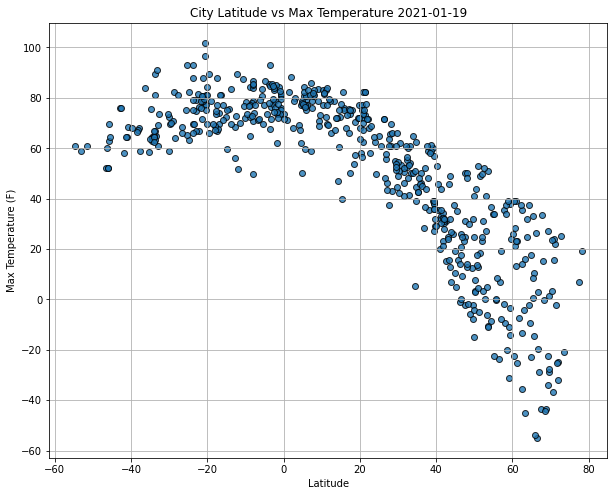

In [8]:
date_time = datetime.date(datetime.now())
# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {date_time}")
plt.grid()
plt.savefig("./output_data/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

The above scatter plot showcase the relationship between Latitude at x-axis vs Max Temperature (F) at the y-axis. This result indicates that there is a higher temrature for the cities that found near to the equater (Latitude 0),however when you go farther from the equator towrads to the north and south the temprature will decrease.

## Latitude vs. Humidity Plot

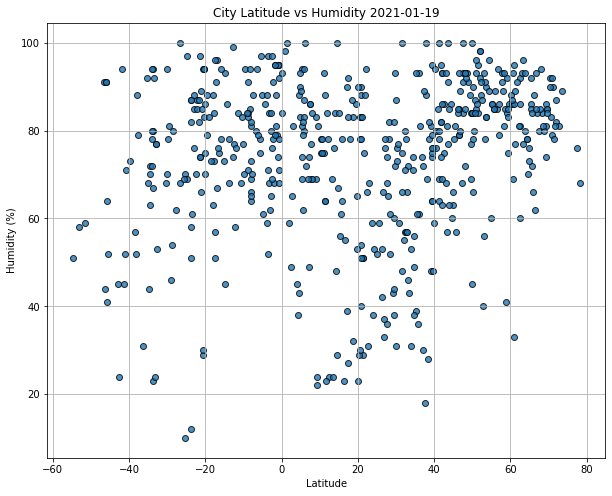

In [9]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

The above scatter plot displayed the relationship between Humidity (%) vs. Latitude.From the result we can infer that humidity is fairly distributed throughout the plot, so we can say that high humidity occur for both cities found farther or near to the equator.

## Latitude vs. Cloudiness Plot

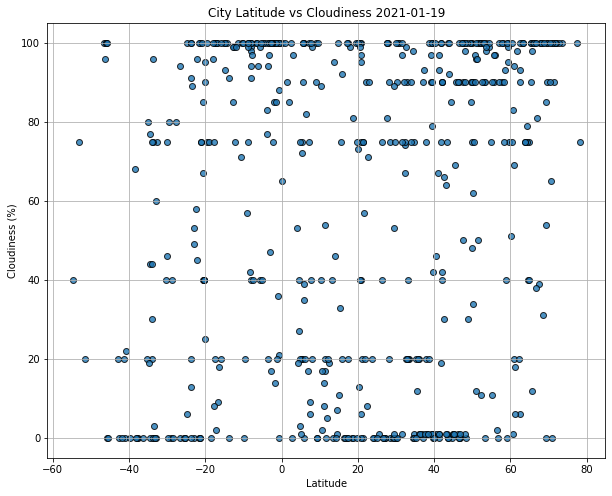

In [10]:

# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

The above scatter plot showed the relationship between the cities cloudness, and latitude. From this result we can tell that the data is evenly distributed, and there is no difference in Cloudiness when the cities farther or nearer to the equater

## Latitude vs. Wind Speed Plot

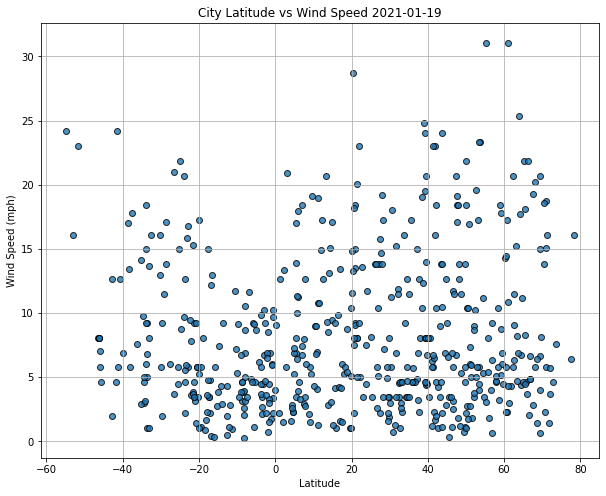

In [11]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The above scatter plot showed the relationship between wind speed (mph), and latitude. The plot displayed the lower wind speed when the cities closer to the equater (latitude 0) and somehow the wind speed increase for the cities farther from the equater.

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}",fontsize = 15)
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=22,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

In [13]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7272415806665413
The correlation between both factors is -0.85


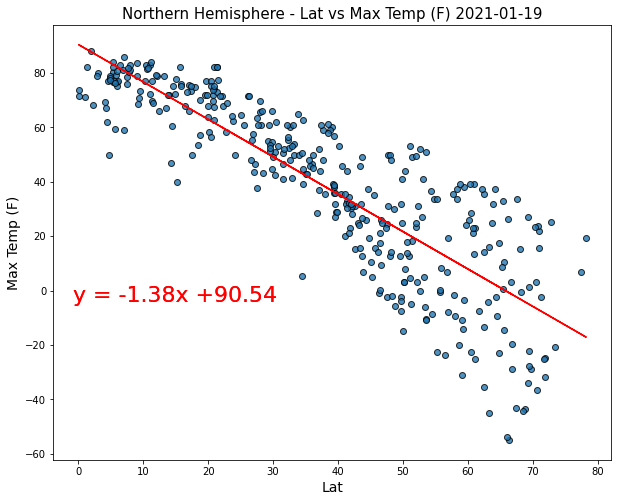

In [14]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(0, 0))
plt.savefig("./output_data/Northern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Maximum tempreture and latitude for Northern Hemisphere cities. The result from the data showed that there is a strong, negative correlation between Maximum tempreture and latitude. These means when we go farther away from the equater(latitude 0) the maximum Temperature (F) will decrease.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.15677271667383078
The correlation between both factors is 0.4


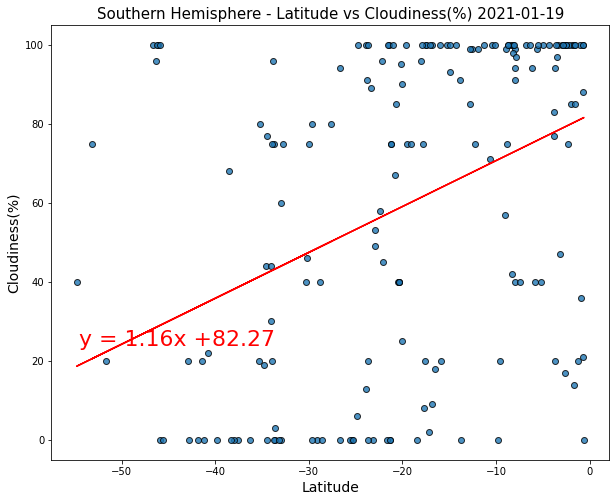

In [15]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

plt.savefig("./output_data/southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Maximum tempreture and latitude for Southern Hemisphere cities.The result from the data showed that there is a very week correlation between Maximum Tempreture and latitude in the Southern Hemisphere cities.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09859471754896706
The correlation between both factors is 0.31


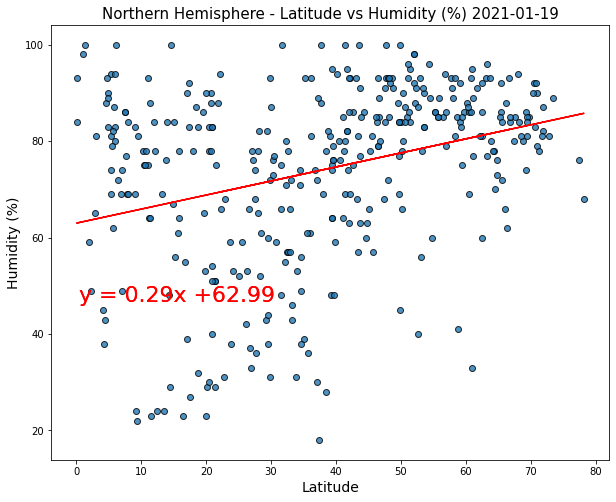

In [16]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))
plt.savefig("./output_data/Northern_Hemisphere_Humidity_Latitude_Linear.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Humidity (%) and Latitude for Northern Hemisphere cities. The result from the data showed that there is a correlation between Humidity (%) and Latitude in the Northern Hemisphere cities.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09859471754896706
The correlation between both factors is 0.31


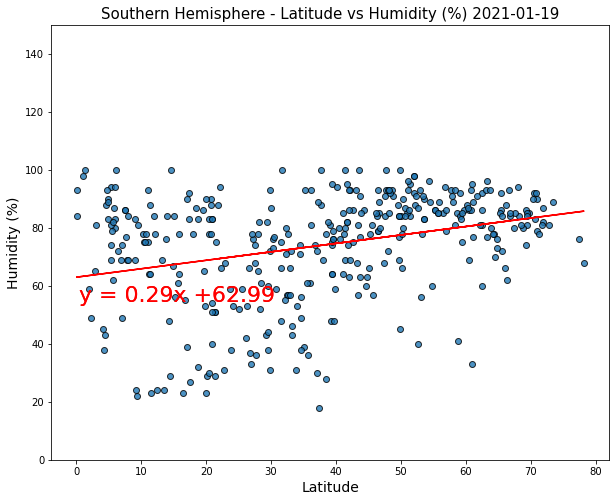

In [17]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = southern_hemisphere_weather_df['Lat']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)
plt.savefig("./output_data/southern_humudity_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Humidity (%) and Latitude for Southern Hemisphere cities. The result from the data showed that there is a correlation between Humidity (%) and Latitude in the Southern Hemisphere cities.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07695071376836513
The correlation between both factors is 0.28


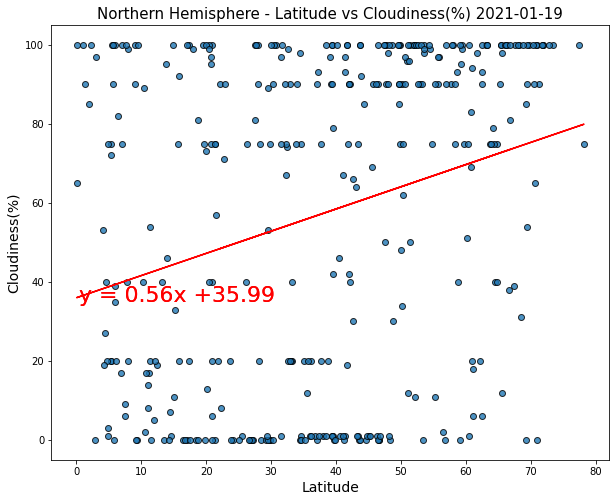

In [18]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

plt.savefig("./output_data/Northern Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Cloudiness (%) and Latitude for Northern_Hemisphere cities. The result from the data showed that there is a correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15677271667383078
The correlation between both factors is 0.4


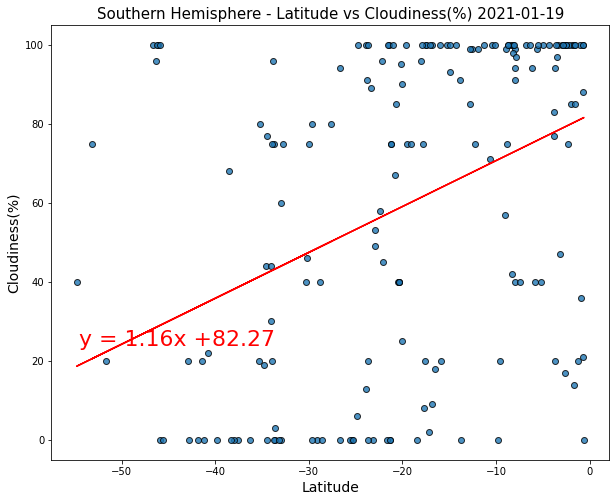

In [19]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("./output_data/Southern_Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Cloudiness (%) and for Southern Hemisphere cities. The result from the data showed that there is a correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0035686395313744832
The correlation between both factors is 0.06


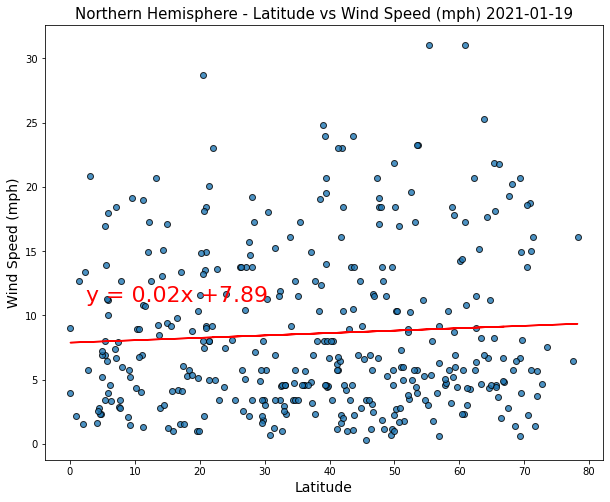

In [20]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("./output_data/Northern_Hemisphere_Wind_Speed_Latitude_Lin.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Wind Speed (mph), and latitude for Northern_Hemisphere cities. The result from the data showed that there is a very week, posetive correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16184868105005112
The correlation between both factors is -0.4


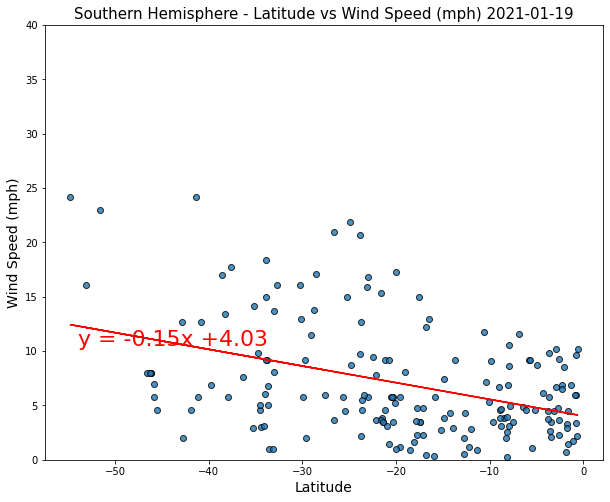

In [21]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("./output_data/Southern_Hemisphere_Wind_Speed_Latitude_Linear_Regression.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Wind Speed (mph), and latitude for Southern Hemisphere. The result from the data showed that there is a very week, negative correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.